In [2]:
# for mathemaical operations
import numpy as np
# for dataframe manipulations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# setting parameters for visualization
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')


import warnings
warnings.filterwarnings("ignore")

import joblib

In [3]:
# lets read the data set
data = pd.read_csv('med-insurance.csv')

In [4]:
data.head(10).style.background_gradient(cmap="Wistia")

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900000,0,yes,southwest,16884.920000
1,18,male,33.800000,1,no,southeast,1725.550000
2,28,male,33.000000,3,no,southeast,4449.460000
3,33,male,22.700000,0,no,northwest,21984.470000
4,32,male,28.900000,0,no,northwest,3866.860000
5,31,female,25.700000,0,no,southeast,3756.620000
6,46,female,33.400000,1,no,southeast,8240.590000
7,37,female,27.700000,3,no,northwest,7281.510000
8,37,male,29.800000,2,no,northeast,6406.410000
9,60,female,25.800000,0,no,northwest,28923.140000


In [5]:
# Take a sample of 5
data.sample(5).style.background_gradient(cmap="Wistia")

,age,sex,bmi,children,smoker,region,expenses
749,28,male,30.900000,0,no,northwest,3062.510000
903,49,male,36.900000,0,no,southeast,8125.780000
321,26,female,29.600000,4,no,northeast,24671.660000
1109,45,male,20.400000,3,no,southeast,8605.360000
423,25,male,30.600000,0,no,northeast,2727.400000


In [6]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
data.shape

(1338, 7)

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [9]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
data.describe().T.style.background_gradient(cmap="Wistia")

,count,mean,std,min,25%,50%,75%,max
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.665471,6.098382,16.000000,26.300000,30.400000,34.700000,53.100000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
expenses,1338.000000,13270.422414,12110.011240,1121.870000,4740.287500,9382.030000,16639.915000,63770.430000


In [10]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


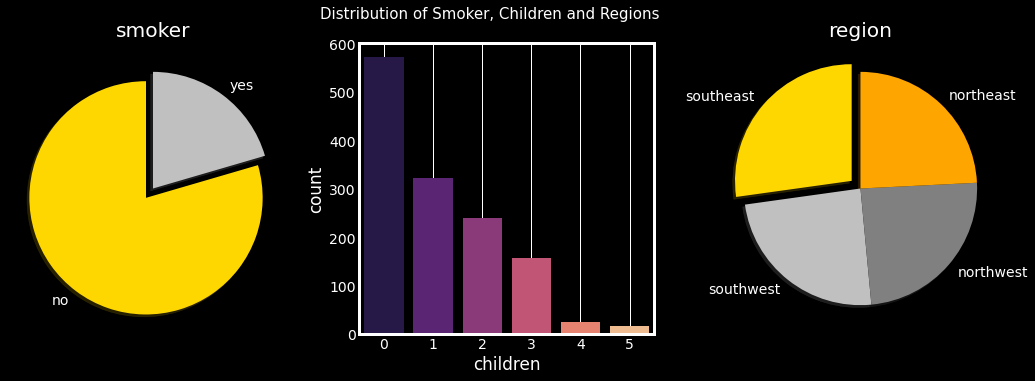

In [11]:
plt.subplot(1, 3, 1)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['gold','silver'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])
plt.title('smoker')

plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold','silver','grey','orange'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])
plt.title('region')
plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 15)
plt.show()

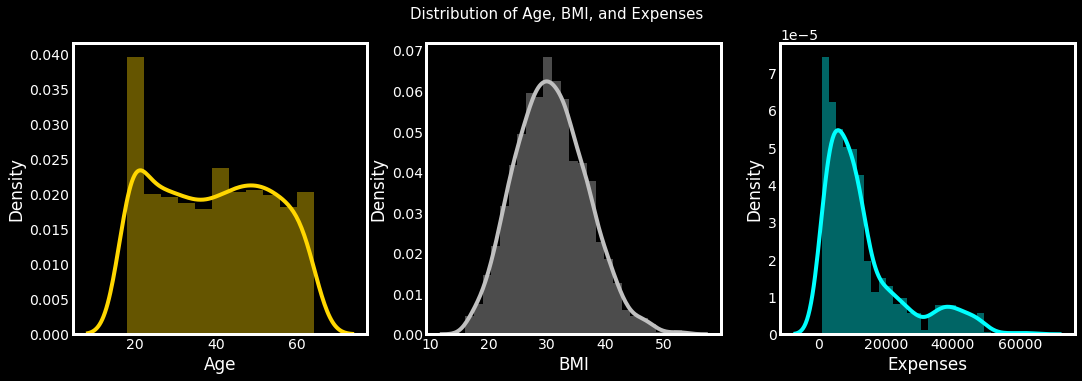

In [12]:
plt.subplot(1, 3, 1)
sns.distplot(data['age'], color = 'gold')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(data['bmi'], color = 'silver')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(data['expenses'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

In [13]:
px.scatter(data, y = 'expenses',
           x = 'age',
           marginal_y = 'violin',
           trendline = 'ols',template = 'plotly_dark')

In [14]:
px.scatter(data, y = 'expenses',
           x = 'bmi',
           marginal_y = 'violin',
           trendline = 'ols',template = 'plotly_dark')

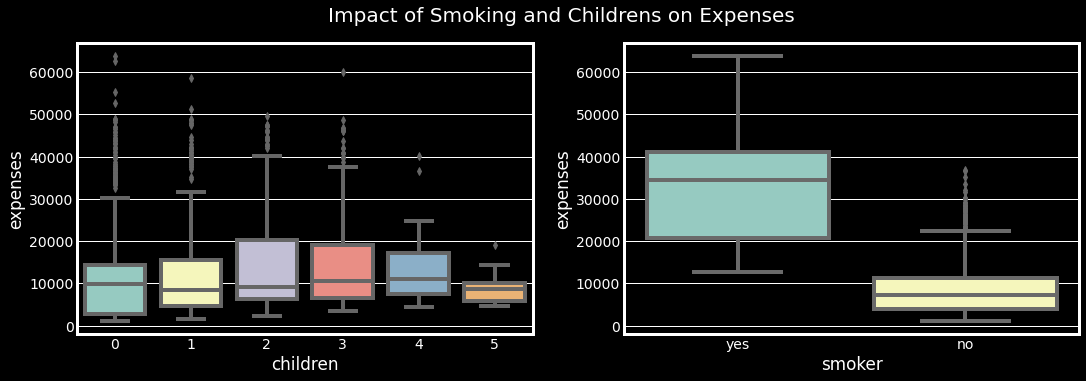

In [15]:
plt.subplot(1, 2, 1)
sns.boxplot(data['children'], data['expenses'])

plt.subplot(1, 2, 2)
sns.boxplot(data['smoker'], data['expenses'])

plt.suptitle('Impact of Smoking and Childrens on Expenses', fontsize = 20)
plt.show()

In [16]:
px.scatter(data,
        x="expenses",
                 y="age",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols",template = 'plotly_dark'
        )


<a id="section-seven"></a>
<div class="alert alert-success" role="alert">
<li>The Expenses of Smokers in all regions ranges from 20 to 60k
<li>Whereas the Expenses of Non Smokers in all regions ranges from 10 to 20K
<li>The Lesser range of Expense is for lesser age people and vice versa.

In [17]:
px.scatter(data,
        x="expenses",
                 y="bmi",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols",template = 'plotly_dark')

<a id="section-seven"></a>
<div class="alert alert-success" role="alert">
<li>We can clearly see that there is a increasing pattern for BMI as well.
<li>For smoker with less BMI: Expense is around 20k
<li>For Smokers with High BMI: Expense is around 50K
<li>For Non Smokers BMI is not a Huge Factor, The Expense range from 5k to 10k

In [18]:
px.scatter(data,
                 x="expenses",
                 y="bmi",
                 size="age",
                 color="smoker",
           hover_name="expenses", size_max=15,template = 'plotly_dark')

<a id="section-seven"></a>
<div class="alert alert-success" role="alert">
<li>This Chart makes it clear that BMI is not powerful indicator Expenses, as people having less BMI also have high Medical Expenses.
<li>This chart makes it clear that People who smoke have higher Medical Expenses.
<li>The Size of Bubble, which represents age, shows that people having higher expenses belong to Higher Expenses category

In [19]:
px.bar_polar(data, r="expenses", theta="region", color = 'sex', template = 'plotly_dark',
            color_discrete_sequence= px.colors.sequential.Plasma_r)

In [20]:
data[['expenses', 'region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap = 'Wistia')

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [22]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null.style.background_gradient(cmap="Wistia")

,Null Values,Percentage Null Values
age,0,0.000000
sex,0,0.000000
bmi,0,0.000000
children,0,0.000000
smoker,0,0.000000
region,0,0.000000
expenses,0,0.000000


In [23]:
duplicate = data.duplicated()
print(duplicate.sum())

1


In [24]:
data.drop_duplicates(inplace=True)

In [25]:
duplicate = data.duplicated()
print(duplicate.sum())

0


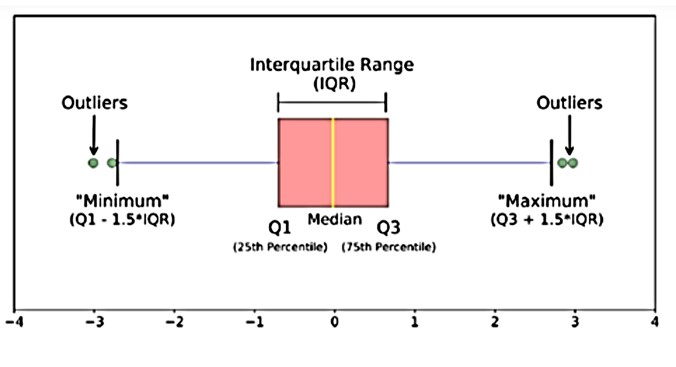

In [26]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['age', 'bmi', 'children', 'expenses']

In [27]:
num_data = data[num_features]
num_data.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [28]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['sex', 'smoker', 'region']

In [29]:
categorical=data[cat_features]
categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


[Text(0, 0, 'age'),
 Text(1, 0, 'bmi'),
 Text(2, 0, 'children'),
 Text(3, 0, 'expenses')]

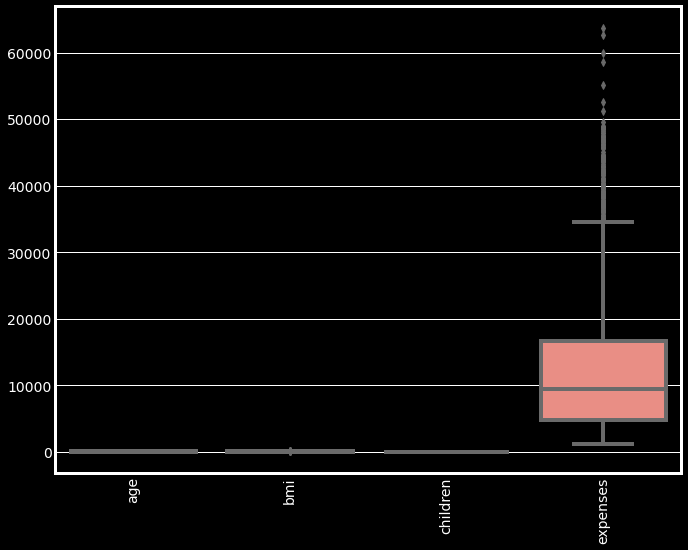

In [30]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = num_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_array = scaler.fit_transform(num_data)

In [32]:
scaled_data = pd.DataFrame(scaled_array, columns = num_data.columns)

scaled_data.head()

,age,bmi,children,expenses
0,-1.440418,-0.453484,-0.909234,0.297856
1,-1.511647,0.513986,-0.079442,-0.954381
2,-0.799350,0.382803,1.580143,-0.729373
3,-0.443201,-1.306169,-0.909234,0.719104
4,-0.514431,-0.289506,-0.909234,-0.777498


[Text(0, 0, 'age'),
 Text(1, 0, 'bmi'),
 Text(2, 0, 'children'),
 Text(3, 0, 'expenses')]

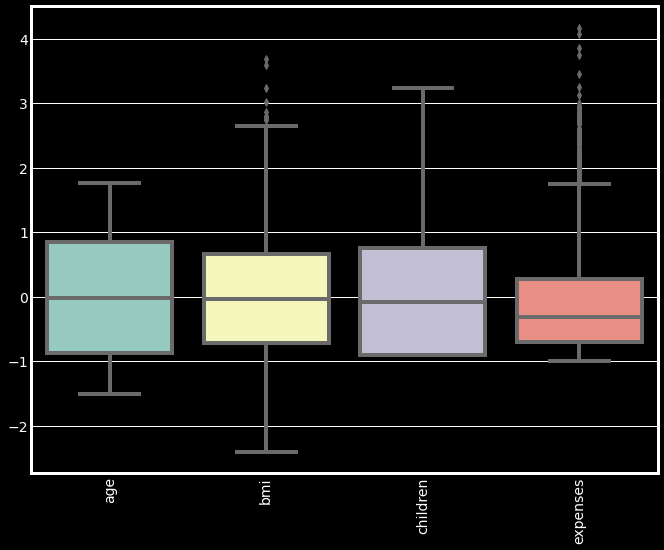

In [33]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = scaled_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [34]:
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

age            24.00
bmi             8.40
children        2.00
expenses    11911.38
dtype: float64


In [35]:
outliers_removed_data = num_data[~ ((num_data < (Q1 - 1.5 * IQR)) \
                                     | (num_data > (Q3 + 1.5 * IQR))).any(axis=1)]

outliers_removed_data.shape

(1192, 4)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
for col in cat_features:
    data[col]=le.fit_transform(data[col])

In [38]:
data.head(10).style.background_gradient(cmap="Wistia")

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.900000,0,1,3,16884.920000
1,18,1,33.800000,1,0,2,1725.550000
2,28,1,33.000000,3,0,2,4449.460000
3,33,1,22.700000,0,0,1,21984.470000
4,32,1,28.900000,0,0,1,3866.860000
5,31,0,25.700000,0,0,2,3756.620000
6,46,0,33.400000,1,0,2,8240.590000
7,37,0,27.700000,3,0,1,7281.510000
8,37,1,29.800000,2,0,0,6406.410000
9,60,0,25.800000,0,0,1,28923.140000


In [39]:
# southwest =3 , southeast = 2, northwest = 1, northeast = 0

In [40]:
data['region'].unique()

array([3, 2, 1, 0])

In [41]:
data = data.reset_index()

In [42]:
data.head(5).style.background_gradient(cmap="Wistia")

,index,age,sex,bmi,children,smoker,region,expenses
0,0,19,0,27.900000,0,1,3,16884.920000
1,1,18,1,33.800000,1,0,2,1725.550000
2,2,28,1,33.000000,3,0,2,4449.460000
3,3,33,1,22.700000,0,0,1,21984.470000
4,4,32,1,28.900000,0,0,1,3866.860000


In [43]:
y=data['expenses']
X=data.drop(['expenses','index'],axis=1)
cols=X.columns
cols

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [47]:
X_train

array([[-0.51560926, -0.99006927, -0.19962247, -0.07370881, -0.50093545,
         0.42467656],
       [ 1.53904979, -0.99006927, -1.44270452, -0.8943336 , -0.50093545,
        -1.38222752],
       [-1.43666331,  1.01003034, -1.01743961, -0.07370881, -0.50093545,
         1.3281286 ],
       ...,
       [-0.72816019,  1.01003034,  1.05981592,  0.74691597, -0.50093545,
         0.42467656],
       [-1.43666331,  1.01003034,  0.76540175, -0.8943336 , -0.50093545,
        -0.47877548],
       [ 0.97224729,  1.01003034, -0.72302544,  0.74691597, -0.50093545,
        -1.38222752]])

In [48]:
X_test

array([[-1.50751362, -0.99006927,  1.46872449, -0.8943336 , -0.50093545,
         0.42467656],
       [ 0.54714542, -0.99006927, -0.23233516, -0.07370881, -0.50093545,
         0.42467656],
       [ 0.68884605,  1.01003034,  0.0947917 , -0.07370881, -0.50093545,
        -1.38222752],
       ...,
       [ 0.83054667,  1.01003034, -0.1341971 , -0.07370881, -0.50093545,
         0.42467656],
       [ 0.97224729,  1.01003034, -1.62262429, -0.8943336 ,  1.99626517,
         0.42467656],
       [ 1.75160073,  1.01003034,  1.20702301, -0.8943336 , -0.50093545,
        -1.38222752]])

In [49]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [50]:
models = []
models.append(('Ridge', Ridge(solver='auto',alpha=0.5,  max_iter=12)))

Training score : 0.7517659331574984
predictions are: 
 [ 5066.06424247  9482.05277707 11408.43091787 26366.67434235
  6950.12283126   749.66614649  1776.98526475 -1127.38039963
  1922.50094412 14238.4770963 ]


r2 score: 0.743845273097629
MAE: 4377.887077314432
MSE: 40865000.54548544
RMSE: 6392.573859212378


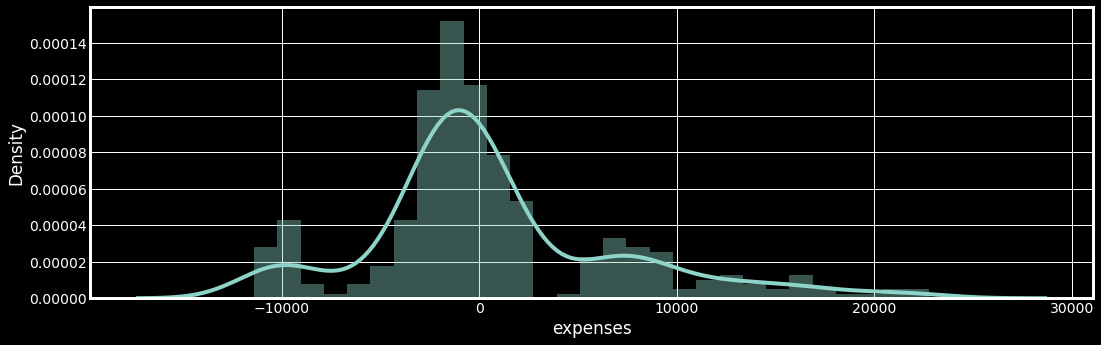

In [51]:
for name, model in models:
    model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction[:10]))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

In [52]:
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)
print('Scaler_File is saved into to disk successfully Using Job Lib')

Scaler_File is saved into to disk successfully Using Job Lib


In [53]:
# save the model to disk
model_filename = "Medical Expenses Prediction.save"

model_filename = joblib.dump(model, model_filename)

print('Model is saved into to disk successfully Using Job Lib')

Model is saved into to disk successfully Using Job Lib


In [54]:
scaler = joblib.load('scaler.save')
model = joblib.load('Medical Expenses Prediction.save')
x =np.array([19,0,27.900000,0,1,3])
x= x.reshape(1, -1)

In [55]:
prediction = model.predict(scaler.transform(x))

In [56]:
prediction

array([25209.47119392])

In [57]:
inp_data = [19,0,27.900000,0,1,3]

In [58]:
inp_data = np.array(inp_data).reshape(1,6)
prediction = model.predict(scaler.transform(inp_data))
prediction = '{:.4f}'.format(prediction[0])

In [59]:
prediction

'25209.4712'

In [60]:
x=[]
def predict_values(x):
    prediction =model.predict(scaler.transform([x]))
    return prediction 

In [62]:
predict_values([19,0,27.900000,0,1,3])

array([25209.47119392])